# Capstone Project 1: Primary Data Exploration And Story Telling

This is the second notebook of four relating to the capstone project.  This leg is all about looking at some quick snapshots of the data to see what we can understand before we build our models.

In [2]:
## import working modules
import pandas as pd
import numpy as np
import glob
import os
import unicodedata
from datetime import datetime
from functools import reduce
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import seaborn as sb
import researchpy as rp
from scipy import stats
import time

In [3]:
## import our now cleaned flat file, remind ourselves what it looks like

player_data = pd.read_csv('Combined_Player_Data2.csv')
player_data.head()

,Unnamed: 0,Fantasy Points,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,...,Overall_Draft_Position,Fantasy Points Per Game,drafted,Total Minutes Played,FantasyPoints_60,Cleaned_Position,C,D,L,R
0,0,25.80,Aaron Ness,2014,NYI,D,20,275.25,1,2,...,40.0,1.29,1,295.88,5.23,D,0,1,0,0
1,1,0.95,Aaron Palushaj,2014,CAR,R,2,17.52,0,0,...,44.0,0.48,1,18.65,3.06,R,0,0,0,1
2,2,27.50,Aaron Rome,2014,DAL,D,25,301.20,0,1,...,104.0,1.10,1,327.20,5.04,D,0,1,0,0
3,3,32.25,Aaron Volpatti,2014,WSH,L,41,300.18,2,0,...,1000.0,0.79,0,301.87,6.41,L,0,0,1,0
4,4,3.45,Adam Almquist,2014,DET,D,2,31.52,1,0,...,210.0,1.72,1,34.43,6.01,D,0,1,0,0


From the start, we can see that this data set is impossibly long to look at every feature, so here we'll pick a few key metrics that will likely pop to visualize.



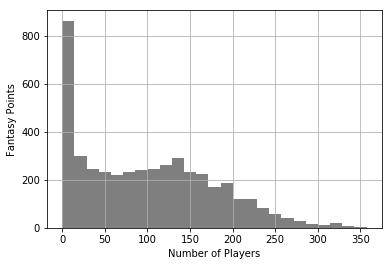

In [10]:
## here I'll map a few of the basic stats as well as essential values
fantasy_points = player_data['Fantasy Points'].sort_values(ascending=False)
point_hist  = fantasy_points.hist(color='k', alpha=0.5, bins=25)
point_hist.plot()
plt.ylabel("Fantasy Points")
plt.xlabel("Number of Players")
plt.savefig('Images/scoredistro.png')

In [9]:
player_data['Fantasy Points'].sort_values(ascending=False).head()

778     357.35
905     349.90
3755    342.30
3626    341.60
2125    338.00
Name: Fantasy Points, dtype: float64

We see a  big grouping at fewer than 50 pt and around 125, then a long tail off to the superstars above 300. What about games played?

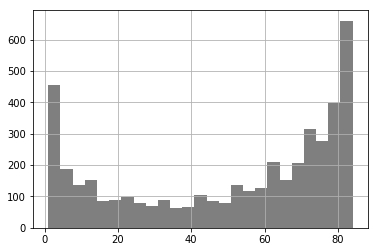

In [5]:
player_data['GP'].hist(color='k', alpha=0.5, bins=25)

This is much more bimodal, and might be an effective binning to use as a way of eliminating potential draft candidates. Afterall, if you're only showing up for less than a quarter of a season, I likely am not interested in drafting you for my team so I wouldn't worry about them.  I'm considering dropping everyone with fewer than 20. What would that look like?

In [11]:
## that said this does drop almost a full quarter of our entries, which has a pretty large trade off
player_data['GP'][player_data['GP'] < 20].count()



1077

Nearly a quarter of players are around for fewer than 20 games! This actually jives with some insider hockey knowledge: since 25 games played is the cut off for an NHL rookie season, teams will bring up young players for trial basis and have them play a few games late in the season or early to give them some experience or a try out. 

Lets make some fun box plots! Some game specific terminology: 

GF_60 = 'goals per 60 minutes played'
TOI_SIndC = 'time on ice, 5 v 5'
iCF_PPIndC = 'independant Corsi For'  
iFF_PPIndC = 'independant fenwick for'

[Corsi and Fewick](https://en.wikipedia.org/wiki/Analytics_(ice_hockey)) are shot metrics, which are described in the hyperlink, but essentially it's shots taken and unblocked shots taken. At this point these are the most accepted form of advanced analytics that the game has, which tells you plenty about the state of the game. 

Going to map some values based around their sort of relative size, but not their relationship. We're looking for distribution not correlation here.

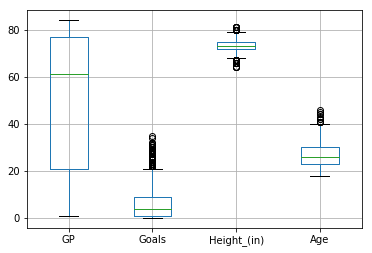

In [11]:
player_data[['GP','Goals', 'Height_(in)', 'Age',]].boxplot()

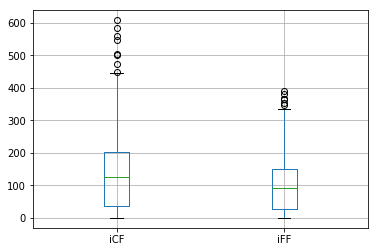

In [12]:
## Analytics Values as Mentioned

player_data[[ 'iCF','iFF']].boxplot()



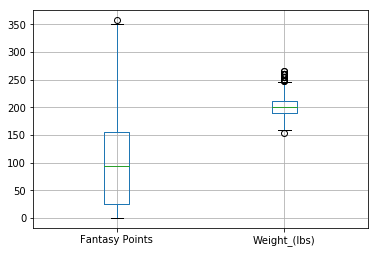

In [13]:
## medium values, again totally unrelated

player_data[['Fantasy Points','Weight_(lbs)']].boxplot()



I'm interested in that top outlier, and had a wild guess that it was Alex Ovechkin, arguably the best player of this generation, who is also something of a [regular](http://www.depthockeyanalytics.com/uncategorized/alex-ovechkins-statistical-dominance-in-the-nhl-hardly/) [discussion](https://twitter.com/IneffectiveMath/status/1091505560699260928) point in the analytics community (for reference, I am inclined to agree with them). 

In [14]:
player_data[player_data['Fantasy Points']>300].sort_values(['Fantasy Points'], ascending=False)[0:5]

,Unnamed: 0,Fantasy Points,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,...,Overall_Draft_Position,Fantasy Points Per Game,drafted,Total Minutes Played,FantasyPoints_60,Cleaned_Position,C,D,L,R
778,778,357.35,Sidney Crosby,2014,PIT,C,80,1373.37,25,41,...,1.0,4.47,1,1757.78,12.20,C,1,0,0,0
905,905,349.90,Alex Ovechkin,2015,WSH,L,81,1334.75,28,19,...,1.0,4.32,1,1646.33,12.75,L,0,0,1,0
3755,3755,342.30,Connor McDavid,2018,EDM,C,82,1433.65,35,49,...,1.0,4.17,1,1766.80,11.62,C,1,0,0,0
3626,3626,341.60,Anze Kopitar,2018,L.A,C,82,1395.50,28,35,...,11.0,4.17,1,1810.58,11.32,C,1,0,0,0
2125,2125,338.00,Jamie Benn,2016,DAL,L,82,1251.85,22,32,...,129.0,4.12,1,1641.80,12.35,L,0,0,1,0


Turns out, I was wrong:  Ovie missed being above 350 by .2 points.  That said this is an interesting barometer for the top players. Crosby and Ovie having the most regular appearances above 300 points, with  Crosby appearing every year that's measured. Not shown here, this current season he's on track for 377, as is Ovechkin. Both players are in  their 14th season, which again, just shows what insanely talented outliers they are.

In [15]:
player_data[player_data['Fantasy Points']>300].groupby("Player")["Player"].count().sort_values( ascending=False)

Player
Sidney Crosby        5
Jamie Benn           4
Alex Ovechkin        4
Claude Giroux        3
Joe Pavelski         3
Erik Karlsson        2
Brent Burns          2
John Tavares         2
Connor McDavid       2
Anze Kopitar         1
Blake Wheeler        1
Vincent Trocheck     1
Evgeni Malkin        1
Tyler Seguin         1
Nathan MacKinnon     1
Patrice Bergeron     1
Patrick Kane         1
Ryan Getzlaf         1
Taylor Hall          1
Aleksander Barkov    1
Name: Player, dtype: int64

Lets check out the drafted vs undrafted numbers.

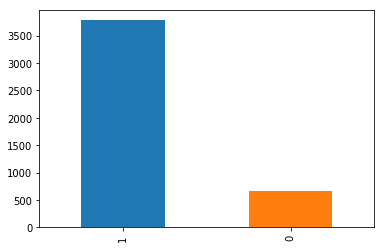

In [16]:
pd.value_counts(player_data['drafted']).plot.bar()

No handles with labels found to put in legend.


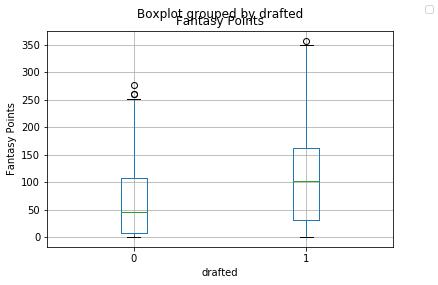

In [17]:
player_data.boxplot(column='Fantasy Points',by='drafted')
plt.ylabel('Fantasy Points')
plt.figlegend()
plt.savefig('Images/drafted_undrafted.png')

While the undrafted group is a lot smaller they have a lot lower bounds on their potential.  lets do some more descriptive things by this and by position.

In [18]:
player_data.groupby("Position")['Fantasy Points'].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
C,1252.0,110.033107,87.092646,0.00,25.4500,102.925,174.9250,357.35
"C, L",52.0,135.097115,65.955875,10.95,80.0375,128.925,194.5875,274.15
"C, R",30.0,140.131667,56.783126,28.95,100.6750,151.275,182.1250,239.00
D,1521.0,95.785043,70.669238,0.00,29.5000,94.050,148.5500,321.60
"D, R",1.0,2.600000,NaN,2.60,2.6000,2.600,2.6000,2.60
L,834.0,91.337950,75.391500,0.00,19.8875,84.050,146.1375,349.90
"L, R",14.0,117.228571,75.300344,1.00,59.6125,146.975,159.2625,222.45
R,740.0,92.999189,75.060902,0.00,22.5625,83.675,147.1500,320.50


In [19]:
## I'm reasonably sure that D, R player is an encoding error somewhere...
player_data[player_data['Position']== 'D, R']

,Unnamed: 0,Fantasy Points,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,...,Overall_Draft_Position,Fantasy Points Per Game,drafted,Total Minutes Played,FantasyPoints_60,Cleaned_Position,C,D,L,R
2278,2278,2.6,Luke Witkowski,2016,T.B,"D, R",4,28.52,0,0,...,160.0,0.65,1,28.52,5.47,D,0,1,0,0


according to wikipedia, it is not an error, but he is a [scrub](https://en.wikipedia.org/wiki/Luke_Witkowski#Detroit_Red_Wings). Some summary stats:

In [20]:
rp.summary_cont(player_data.groupby("Position")['Fantasy Points'])

,N,Mean,SD,SE,95% Conf.,Interval
Position,,,,,,
C,1252,110.033107,87.092646,2.461384,105.206867,114.859347
"C, L",52,135.097115,65.955875,9.146434,116.995202,153.199028
"C, R",30,140.131667,56.783126,10.367133,119.464718,160.798616
D,1521,95.785043,70.669238,1.812032,92.232292,99.337793
"D, R",1,2.600000,NaN,NaN,NaN,NaN
L,834,91.337950,75.391500,2.610594,86.218115,96.457785
"L, R",14,117.228571,75.300344,20.124863,76.294838,158.162305
R,740,92.999189,75.060902,2.759294,87.587316,98.411063


let's compare avg time vs avg ppg, starting with some t-tests and looking at correlated values.

In [21]:
## t-test 


stats.ttest_ind(player_data['Fantasy Points Per Game'],player_data['TOI_GP'])



Ttest_indResult(statistic=-197.2636052093086, pvalue=0.0)

I've never seen a p-value that's literally 0

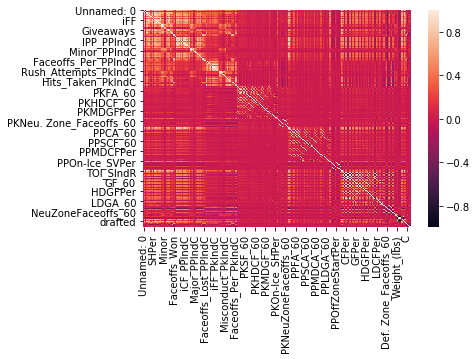

In [22]:
## fun but messy plotting
corr = player_data.corr(method='pearson')
sb.heatmap(corr)

what stands out to me here is that corsi (iCF), fenwick (iFF), and time on ice (metrics with TOI) all coorelate better than values that I'd have guessed would be way more predictive, such as assists or goals, which are actually included in the metric. Also interesting is the negative corralation from Draft Position, which I'd have assumed would be similar in value to TOI. 

Someplace in between is the values against players (GA_60 = Goals against the player over 60 min, SA_60 shots against the player's team, etc) also have a negative correlation. While I wouldn't have expected a massive link, negative is a bit surprising. My thesis on this (which will go unexplored here because it would be a much different project) is that players work harder if they're doing poorly defensively or playing from behind frequently. 

Finally Draft Position seems very low on correlation which fits with the first draft here, but is perhaps even lower than expected.

In [23]:

sorted_fantasy_value = corr.iloc[:,-3].sort_values(ascending = False)
sorted_fantasy_value.iloc[0:15,]

D                       1.000000
Shots_Blocked           0.564024
TOI_GP                  0.485088
Shots_Blocked_PkIndC    0.424144
Hits_PkIndC             0.392866
Giveaways_PkIndC        0.383379
PKTOI_GP                0.358788
Shots_Blocked_PPIndC    0.303059
PKTOI                   0.280984
TOI_PkIndC              0.280984
Giveaways               0.263534
Height_(in)             0.233306
Hits_Taken_PkIndC       0.194625
PKPDO                   0.193604
Hits_Taken              0.188436
Name: D, dtype: float64

In [24]:
sorted_fantasy_value.iloc[220:,]

iHDCF_PkIndC            -0.263476
Faceoffs_Lost_PkIndC    -0.266876
iSCF_PkIndC             -0.272123
SHPer                   -0.275922
Rush_Attempts           -0.295324
R                       -0.322588
Off. Zone_Faceoffs_60   -0.326164
iHDCF_PPIndC            -0.328731
Faceoffs_Won            -0.330161
FantasyPoints_60        -0.336123
Faceoffs_Lost           -0.345306
L                       -0.350474
Goals                   -0.359143
iSCF                    -0.395893
Faceoffs_Per_PPIndC     -0.465978
C                       -0.472678
IPP                     -0.506400
iHDCF                   -0.524242
Name: D, dtype: float64

In [25]:
sorted_fantasy_value.loc['drafted']

-0.008305515990254933

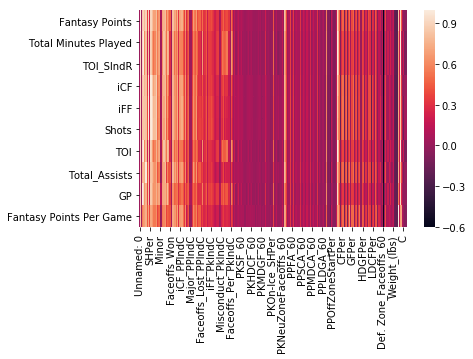

In [38]:
mapable_fantasy_value = corr.sort_values(by="Fantasy Points",ascending = False)
sb.heatmap(mapable_fantasy_value.iloc[0:10])

So the correlation to drafted is very slight but does exist. Just to make sure this wasn't from the alteration I made in the data munging of creating false numeric values for the undrafted players, I recreated the frame without the undrafted players and rechecked the correlations.

In [17]:
draft_index = (player_data['drafted'] == 1) 
drafted_players = player_data[draft_index]
dcorr = drafted_players.corr(method='pearson')
drafted_fantasy_value = dcorr.iloc[:,-3].sort_values(ascending = False)
drafted_fantasy_value.iloc[0:10,]

D                       1.000000
Shots_Blocked           0.573146
TOI_GP                  0.477452
Shots_Blocked_PkIndC    0.436242
Hits_PkIndC             0.405060
Giveaways_PkIndC        0.395292
PKTOI_GP                0.375809
Shots_Blocked_PPIndC    0.310770
PKTOI                   0.288934
TOI_PkIndC              0.288934
Name: D, dtype: float64

In [43]:
drafted_fantasy_value.loc['Draft_Round']


-0.22545016611316257

In [44]:
drafted_fantasy_value.loc['Overall_Draft_Position']

-0.2353855889528494

interestingly that stays almost the exact same, Overall Postion went from -0.232 to -0.235, while Draft_Round went from -0.207 to -0.225. I'd say that means it's safe to use the whole data set, and since I won't use the negative values, or the drafted value, it's fine to ignore that grouping. Still surprising how little impact it has over all. Just for fun I'm mapping out the draft value vs fantasy points here. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


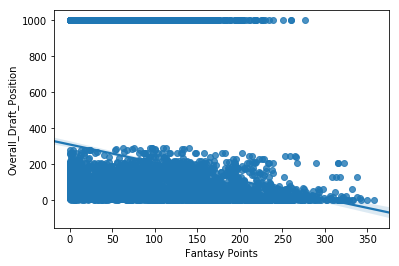

In [45]:

sb.regplot(player_data['Fantasy Points'],player_data['Overall_Draft_Position'])


That looks terrible due to the undrafted players. running it again with just the drafted folks is somewhat better but you can still see the lack of real correlation pretty quickly.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


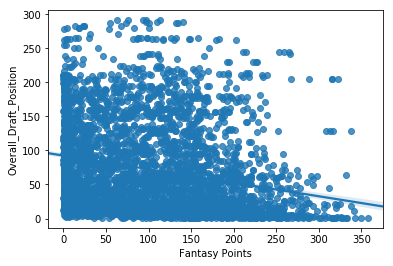

In [41]:
sb.regplot(drafted_players['Fantasy Points'],drafted_players['Overall_Draft_Position'])
plt.savefig('Images/draft_position.png')

I was also interested in the narrative of how height affects performance, as there is a belief that 'small undersized players can't compete'. but what we see here is there's no correlation, at least to fantasy value.

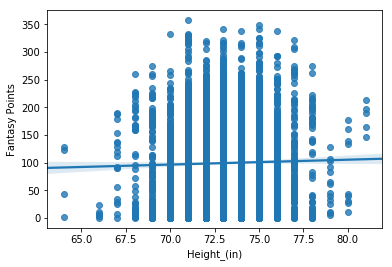

In [20]:
sb.regplot(player_data['Height_(in)'],player_data['Fantasy Points'])
plt.savefig('Images/height_value.png')

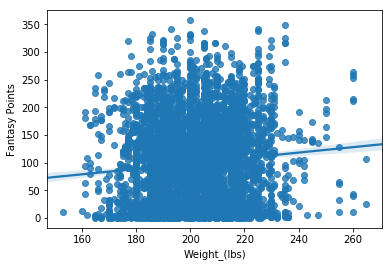

In [21]:
sb.regplot(player_data['Weight_(lbs)'],player_data['Fantasy Points'])
plt.savefig('Images/weight_value.png')

Ok, enough of the things that don't correlate, that's test some that are. 

I'm going to look values that are above .8 and aren't directly scored in fantasy value creation. That leaves us with:

     TOI_SIndR                  0.918613
     iCF                        0.911318
     iFF                        0.909016
     TOI                        0.901212
     GP                         0.868733
     TOI_PPIndC                 0.822900
     PPTOI                      0.822900
     iSCF                       0.817299
     Rebounds_Created           0.809625
     Takeaways                  0.807529

This is a nice even 10 values; I think you could make a good argument that games played is a junk value in some ways since of course a higher number of games played is going to result in a higher total on average, but you can't particularly control for that or predict it given the nature of injuries. I'm going to leave it in there at the moment, but might remove it later on. I'd probably drop it overall if there weren't so few values above 80, and only 4 above 90, but the fact that it's 5th highest does raise some flags.

I also wanted to compare what would happen with the high valued players if they were comparing rates verse total points. It seems like that doesn't really create any surprises. 

In [42]:

high_valued = player_data[['Player','Year','Team','Fantasy Points', 'Fantasy Points Per Game','TOI_SIndR',"iCF","iFF","TOI","GP", "TOI_PPIndC", "PPTOI", "iSCF", "Rebounds_Created", "Takeaways"]]
high_valued.sort_values(by='Fantasy Points', ascending = False)[0:10]

,Player,Year,Team,Fantasy Points,Fantasy Points Per Game,TOI_SIndR,iCF,iFF,TOI,GP,TOI_PPIndC,PPTOI,iSCF,Rebounds_Created,Takeaways
778,Sidney Crosby,2014,PIT,357.35,4.47,1757.78,305,250,1373.37,80,343.03,343.03,195,20,38
905,Alex Ovechkin,2015,WSH,349.90,4.32,1646.40,558,390,1334.75,81,309.27,309.27,269,24,42
3755,Connor McDavid,2018,EDM,342.30,4.17,1766.80,358,301,1433.65,82,243.02,243.02,275,25,100
3626,Anze Kopitar,2018,L.A,341.60,4.17,1810.97,261,199,1395.50,82,236.70,236.70,159,15,49
733,Ryan Getzlaf,2014,ANA,338.00,4.39,1638.97,248,197,1188.18,77,282.03,282.03,140,19,36
2125,Jamie Benn,2016,DAL,338.00,4.12,1641.80,316,247,1251.85,82,261.20,261.20,201,19,57
3444,Sidney Crosby,2017,PIT,332.85,4.44,1490.83,307,239,1210.08,75,271.07,271.07,200,26,39
4410,Vincent Trocheck,2018,FLA,332.35,4.05,1751.87,338,284,1317.43,82,285.10,285.10,173,20,50
4324,Sidney Crosby,2018,PIT,331.50,4.04,1696.52,312,258,1376.13,82,299.25,299.25,201,21,38
2550,Sidney Crosby,2016,PIT,328.60,4.11,1637.55,329,254,1308.80,80,296.88,296.88,192,21,38


In [43]:

high_valued[high_valued['GP']>20].sort_values(by='Fantasy Points Per Game', ascending = False)[0:10]

,Player,Year,Team,Fantasy Points,Fantasy Points Per Game,TOI_SIndR,iCF,iFF,TOI,GP,TOI_PPIndC,PPTOI,iSCF,Rebounds_Created,Takeaways
778,Sidney Crosby,2014,PIT,357.35,4.47,1757.78,305,250,1373.37,80,343.03,343.03,195,20,38
3444,Sidney Crosby,2017,PIT,332.85,4.44,1490.83,307,239,1210.08,75,271.07,271.07,200,26,39
733,Ryan Getzlaf,2014,ANA,338.00,4.39,1638.97,248,197,1188.18,77,282.03,282.03,140,19,36
905,Alex Ovechkin,2015,WSH,349.90,4.32,1646.40,558,390,1334.75,81,309.27,309.27,269,24,42
4172,Nathan MacKinnon,2018,COL,317.35,4.29,1472.98,382,301,1182.30,74,266.35,266.35,234,22,35
794,Steven Stamkos,2014,T.B,158.40,4.28,749.22,146,115,586.18,37,142.05,142.05,91,4,22
3847,Evgeni Malkin,2018,PIT,325.80,4.18,1481.22,252,210,1189.45,78,286.28,286.28,177,22,71
22,Alex Ovechkin,2014,WSH,325.60,4.17,1602.53,505,367,1204.22,78,392.77,392.77,217,19,28
3626,Anze Kopitar,2018,L.A,341.60,4.17,1810.97,261,199,1395.50,82,236.70,236.70,159,15,49
3755,Connor McDavid,2018,EDM,342.30,4.17,1766.80,358,301,1433.65,82,243.02,243.02,275,25,100


Let's again look at some t-tests for how the highest metrics line up wiht the highly valued players.

In [44]:
stats.ttest_ind(high_valued['Fantasy Points'],high_valued['TOI_SIndR'])

Ttest_indResult(statistic=-83.38713763326211, pvalue=0.0)

In [45]:
for i in high_valued.iloc[:, 4:]:
    print(i+"   :    ", stats.ttest_ind(high_valued['Fantasy Points'],high_valued[i]))

Fantasy Points Per Game   :     Ttest_indResult(statistic=83.84715301341431, pvalue=0.0)
TOI_SIndR   :     Ttest_indResult(statistic=-83.38713763326211, pvalue=0.0)
iCF   :     Ttest_indResult(statistic=-16.407521106640285, pvalue=1.2655513711812856e-59)
iFF   :     Ttest_indResult(statistic=1.4719473746068694, pvalue=0.1410705031398806)
TOI   :     Ttest_indResult(statistic=-84.10092190030643, pvalue=0.0)
GP   :     Ttest_indResult(statistic=39.55693024909682, pvalue=0.0)
TOI_PPIndC   :     Ttest_indResult(statistic=15.522496311169691, pvalue=1.2319996029054058e-53)
PPTOI   :     Ttest_indResult(statistic=15.522496311169691, pvalue=1.2319996029054058e-53)
iSCF   :     Ttest_indResult(statistic=28.25137678974906, pvalue=3.1754817960054516e-168)
Rebounds_Created   :     Ttest_indResult(statistic=78.96938007509733, pvalue=0.0)
Takeaways   :     Ttest_indResult(statistic=70.13308825204936, pvalue=0.0)


In [46]:
from math import sqrt
from scipy.stats import t
# Run independent t-test
ind_t_test = stats.ttest_ind(high_valued['Fantasy Points'],high_valued['TOI_SIndR'])

# Calculate the mean difference and 95% confidence interval
N1 = 4444
N2 = 4444
df = (N1 + N2)
std1 = high_valued['Fantasy Points'].std()
std2 = high_valued['TOI_SIndR'].std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 

diff_mean = high_valued['Fantasy Points'].mean() - high_valued['TOI_SIndR'].mean()
MoE = t.ppf(0.975, df) * std_N1N2 * sqrt(1/N1 + 1/N2)

print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(ind_t_test[0],ind_t_test[1]))
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The results of the independent t-test are: 
	t-value = -83.387
	p-value = 0.000

The difference between groups is -729.0 [-746.1 to -711.9] (mean [95% CI])


Turns out that's a jumbled mess. Let's try creating a new feature, and tuning for that. We're going to create a fantasy points per 60 measure, and then see how our results work if instead we look at fantasy points per game instead of whole season. Then we'll look at a second round of summary stats like mean value.

In [47]:
## first we need an actual count of minutes played
player_data['Total Minutes Played'] = player_data['TOI'] + player_data['PPTOI'] + player_data['PKTOI']

player_data['FantasyPoints_60'] = player_data['Fantasy Points']/(player_data['Total Minutes Played']/60)


In [48]:
player_data[['Player', 'Year', 'Fantasy Points','Fantasy Points Per Game','FantasyPoints_60', 'Total Minutes Played']][0:11]

,Player,Year,Fantasy Points,Fantasy Points Per Game,FantasyPoints_60,Total Minutes Played
0,Aaron Ness,2014,25.80,1.29,5.231674,295.89
1,Aaron Palushaj,2014,0.95,0.48,3.056300,18.65
2,Aaron Rome,2014,27.50,1.10,5.042787,327.20
3,Aaron Volpatti,2014,32.25,0.79,6.410044,301.87
4,Adam Almquist,2014,3.45,1.72,6.010453,34.44
5,Adam Burish,2014,13.10,0.87,5.446985,144.30
6,Adam Cracknell,2014,18.35,0.97,7.082663,155.45
7,Adam Hall,2014,89.95,1.12,6.862920,786.40
8,Adam Henrique,2014,199.45,2.59,8.608238,1390.18
9,Adam Larsson,2014,37.75,1.45,4.898462,462.39


In [49]:
player_data[['Player', 'Year', 'Fantasy Points','Fantasy Points Per Game','FantasyPoints_60', 'Total Minutes Played']].mean()

Year                       2016.003150
Fantasy Points               99.306604
Fantasy Points Per Game       1.719617
FantasyPoints_60              6.811713
Total Minutes Played        828.187894
dtype: float64

Looking at rates by points per game with more than 4 complete games played we see basically the same thing again, few surprises:

In [50]:
Avg_min = player_data[player_data['Total Minutes Played']>120]
Avg_min[['Player', 'Year', 'Fantasy Points','Fantasy Points Per Game','FantasyPoints_60', 'Total Minutes Played']].sort_values(by = ['FantasyPoints_60','Fantasy Points','FantasyPoints_60'],ascending = False)[0:15]

,Player,Year,Fantasy Points,Fantasy Points Per Game,FantasyPoints_60,Total Minutes Played
3456,Steven Stamkos,2017,69.35,4.08,13.692004,303.90
3444,Sidney Crosby,2017,332.85,4.44,13.395894,1490.83
1077,Colin McDonald,2015,42.00,2.33,13.324169,189.13
3847,Evgeni Malkin,2018,325.80,4.18,13.197318,1481.21
4172,Nathan MacKinnon,2018,317.35,4.29,12.935726,1471.97
2956,Evgeni Malkin,2017,245.45,3.96,12.757387,1154.39
905,Alex Ovechkin,2015,349.90,4.32,12.751922,1646.34
4347,Taylor Hall,2018,307.80,4.05,12.694878,1454.76
794,Steven Stamkos,2014,158.40,4.28,12.685362,749.21
4226,Patrice Bergeron,2018,262.55,4.10,12.663285,1243.99


On a global scale, lots of players who just played one game or two show up very high due to limited sample.  That said limiting to the players who have played 5 games worth of minutes we see exactly the kind of grouping we'd expect here, and about the same for those who played the average toi per game * 5. That said the drop in performance is a lot less: the bottom players still are averaging some impact.

This first chart is players who have over 350 minutes. I arrived at 350 minutes since that's more than 20 games given the average time played per game in the sample.

In [51]:
player_data[player_data['Total Minutes Played']>350].sort_values(by = ['FantasyPoints_60','Fantasy Points','FantasyPoints_60'],ascending = False)[0:20]

,Unnamed: 0,Fantasy Points,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,...,Overall_Draft_Position,Fantasy Points Per Game,drafted,Total Minutes Played,FantasyPoints_60,Cleaned_Position,C,D,L,R
3444,3444,332.85,Sidney Crosby,2017,PIT,C,75,1210.08,30,34,...,1.0,4.44,1,1490.83,13.395894,C,1,0,0,0
3847,3847,325.80,Evgeni Malkin,2018,PIT,C,78,1189.45,28,32,...,2.0,4.18,1,1481.21,13.197318,C,1,0,0,0
4172,4172,317.35,Nathan MacKinnon,2018,COL,C,74,1182.30,27,37,...,1.0,4.29,1,1471.97,12.935726,C,1,0,0,0
2956,2956,245.45,Evgeni Malkin,2017,PIT,C,62,923.42,22,27,...,2.0,3.96,1,1154.39,12.757387,C,1,0,0,0
905,905,349.90,Alex Ovechkin,2015,WSH,L,81,1334.75,28,19,...,1.0,4.32,1,1646.34,12.751922,L,0,0,1,0
4347,4347,307.80,Taylor Hall,2018,N.J,L,76,1225.68,24,30,...,1.0,4.05,1,1454.76,12.694878,L,0,0,1,0
794,794,158.40,Steven Stamkos,2014,T.B,C,37,586.18,15,11,...,1.0,4.28,1,749.21,12.685362,C,1,0,0,0
4226,4226,262.55,Patrice Bergeron,2018,BOS,C,64,935.98,18,21,...,45.0,4.10,1,1243.99,12.663285,C,1,0,0,0
3633,3633,233.35,Auston Matthews,2018,TOR,C,62,988.73,28,21,...,1.0,3.76,1,1123.95,12.456960,C,1,0,0,0
733,733,338.00,Ryan Getzlaf,2014,ANA,C,77,1188.18,26,38,...,19.0,4.39,1,1637.93,12.381482,C,1,0,0,0


In [52]:
player_data['TOI_GP'].mean()

15.021347884788423

In [53]:
player_data['TOI_GP'].mean() * 5

75.10673942394212

The Following is just five games played:

In [54]:
player_data[player_data['Total Minutes Played']>75].sort_values(by = ['FantasyPoints_60','Fantasy Points'],ascending = False)[0:10]

,Unnamed: 0,Fantasy Points,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,...,Overall_Draft_Position,Fantasy Points Per Game,drafted,Total Minutes Played,FantasyPoints_60,Cleaned_Position,C,D,L,R
3456,3456,69.35,Steven Stamkos,2017,T.B,C,17,235.32,6,7,...,1.0,4.08,1,303.90,13.692004,C,1,0,0,0
3444,3444,332.85,Sidney Crosby,2017,PIT,C,75,1210.08,30,34,...,1.0,4.44,1,1490.83,13.395894,C,1,0,0,0
1077,1077,42.00,Colin McDonald,2015,NYI,R,18,186.63,2,6,...,51.0,2.33,1,189.13,13.324169,R,0,0,0,1
3847,3847,325.80,Evgeni Malkin,2018,PIT,C,78,1189.45,28,32,...,2.0,4.18,1,1481.21,13.197318,C,1,0,0,0
4172,4172,317.35,Nathan MacKinnon,2018,COL,C,74,1182.30,27,37,...,1.0,4.29,1,1471.97,12.935726,C,1,0,0,0
2956,2956,245.45,Evgeni Malkin,2017,PIT,C,62,923.42,22,27,...,2.0,3.96,1,1154.39,12.757387,C,1,0,0,0
905,905,349.90,Alex Ovechkin,2015,WSH,L,81,1334.75,28,19,...,1.0,4.32,1,1646.34,12.751922,L,0,0,1,0
4347,4347,307.80,Taylor Hall,2018,N.J,L,76,1225.68,24,30,...,1.0,4.05,1,1454.76,12.694878,L,0,0,1,0
794,794,158.40,Steven Stamkos,2014,T.B,C,37,586.18,15,11,...,1.0,4.28,1,749.21,12.685362,C,1,0,0,0
4226,4226,262.55,Patrice Bergeron,2018,BOS,C,64,935.98,18,21,...,45.0,4.10,1,1243.99,12.663285,C,1,0,0,0


This list still makes good sense, guys like Steve Stamkos and Jeff Carter who are top of class players who had seasons cut short due to injury or the like.  The one surprise here is Colin McDonald who shows up at 3rd. Looking at some articles for that season, it appears he was a late season call up the hottest line of a team making a play off push. Basically everything at the right time. Moving on to things corralating to fantasy points per game.

In [55]:
player_data['Fantasy Points Per Game'].mean()

1.7196174617461755

In [56]:
player_data['Fantasy Points Per Game'].std()

0.7767397757292049

In [57]:
newCorr = player_data.corr(method = 'pearson')
sorted_fantasy_valuePG = newCorr.iloc[:,-3].sort_values(ascending = False)
sorted_fantasy_valuePG.iloc[0:15,]

D                       1.000000
Shots_Blocked           0.564024
TOI_GP                  0.485088
Shots_Blocked_PkIndC    0.424144
Hits_PkIndC             0.392866
Giveaways_PkIndC        0.383379
PKTOI_GP                0.358788
Shots_Blocked_PPIndC    0.303059
PKTOI                   0.280984
TOI_PkIndC              0.280984
Giveaways               0.263534
Height_(in)             0.233306
Hits_Taken_PkIndC       0.194625
PKPDO                   0.193604
Hits_Taken              0.188436
Name: D, dtype: float64

What's interesting to me here is that the values are aproximately the same still (Corsi and Fensick specifically sit at the same ranking), but the strength of correlation has dropped off, as has the value of scoring chances, rebounds and takeaways. Witness the top values side by side with respective correlation

| Feature      | Total Points           | Points Per Game  | Points Per Game Rank |
| ------------- |:-------------:| -----:| -----:|
| TOI_SIndR     |  0.918613 | 0.689959 | 6th |
| iCF      | 0.911318     |   0.714986 | 2nd |
| iFF | 0.909016     |    0.714448 | 3rd |
| TOI    |  0.901212 | 0.662317 | 9th |
| GP     | 0.868733    |   0.579444 | 20th |
| TOI_PPIndC  | 0.822900     |    0.719050 | 1st |
| iSCF      | 0.822900 | 0.649937 | 11th |
| Rebounds_Created      | 0.809625     |   0.636078 | 15th |
| Takeaways | 0.807529     |    0.643104 | 14th |

Here are the top ten correlated values directly for Points Per Game:

| Feature       | Correlation to Points Per Game         | 
| ------------- |:-------------:| 
TOI_PPIndC                 0.719050
iCF                        0.714986
iFF                        0.714448
TOI_GP                     0.701839
Total Minutes Played       0.689966
TOI_SIndR                  0.689959
PPTOI_GP                   0.682719
iSCF_PPIndC                0.680967
TOI                        0.662317
iFF_PPIndC                 0.656715


Interestingly, these values are now 6 out of 10 based around minutes played, where as with over all points it was 4 of 10. This was essentially the inverse of what I'd expected, since I thought that the Points Per Game feature would reduce the dependancy on time.  Let's see what happens with fantasy points per 60 minutes.


In [58]:
sorted_fantasy_valuePG = newCorr.iloc[:,-1].sort_values(ascending = False)
sorted_fantasy_valuePG.iloc[0:15,]


R                          1.000000
IPP                        0.162738
iHDCF                      0.158660
Off. Zone_Faceoffs_60      0.135955
iSCF                       0.130485
iHDCF_PPIndC               0.121581
OffZoneStartPer            0.121076
Goals                      0.116466
Rush_Attempts              0.115106
Neu. Zone_Faceoffs_60      0.106911
PKOff. Zone_Faceoff_Per    0.106534
PKOffZoneStartPer          0.102869
PIM_PPIndC                 0.093604
Total_Penalties_PPIndC     0.090391
Misconduct                 0.090267
Name: R, dtype: float64

This is slightly disheartening, since we have effectively dropped down to having only 3 values that are above 50 that aren't baked into the points score (IPP, SHPer, and GF_60). So we're back where we started. Given that total points is in fact what we're most interested in, the feature creation seems to have been something of a null result, and perhaps a lesson in overtuning. 

Let's take a quick lok at how things stand up based on position, first with a T-Test and then some density plots.

In [13]:
## one hot again
## create position as just one value instead of multiple, accepting that first listed value is primary
player_data['Cleaned_Position'] = player_data['Position'].str[0]

## let's one hot these for better feature usage since most every model will want a numerical value
one_hot_p = pd.get_dummies(player_data.Cleaned_Position)
new_player_data = pd.concat([player_data, one_hot_p], axis=1)
new_player_data[0:5]

,Unnamed: 0,Fantasy Points,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,...,FantasyPoints_60,Cleaned_Position,C,D,L,R,C,D,L,R
0,0,25.80,Aaron Ness,2014,NYI,D,20,275.25,1,2,...,5.23,D,0,1,0,0,0,1,0,0
1,1,0.95,Aaron Palushaj,2014,CAR,R,2,17.52,0,0,...,3.06,R,0,0,0,1,0,0,0,1
2,2,27.50,Aaron Rome,2014,DAL,D,25,301.20,0,1,...,5.04,D,0,1,0,0,0,1,0,0
3,3,32.25,Aaron Volpatti,2014,WSH,L,41,300.18,2,0,...,6.41,L,0,0,1,0,0,0,1,0
4,4,3.45,Adam Almquist,2014,DET,D,2,31.52,1,0,...,6.01,D,0,1,0,0,0,1,0,0


In [69]:
## lets see how the t_tests stand up here


stats.ttest_ind(player_data['Fantasy Points'][player_data['C']== 1],player_data['Fantasy Points'][player_data['C']== 0])

Ttest_indResult(statistic=7.004654692044053, pvalue=2.8478722526491826e-12)

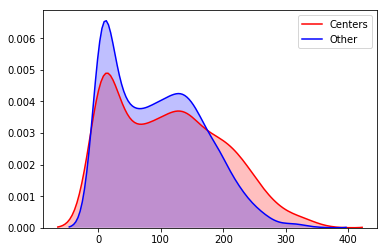

In [70]:
## looks good, quick density plot
p1=sb.kdeplot(player_data['Fantasy Points'][player_data['C']== 1], shade=True, color="r",  label='Centers')
p1=sb.kdeplot(player_data['Fantasy Points'][player_data['C']== 0], shade=True, color="b", label='Other')

In [71]:
# repeating for D men
stats.ttest_ind(player_data['Fantasy Points'][player_data['D']== 1],player_data['Fantasy Points'][player_data['D']== 0])

Ttest_indResult(statistic=-2.2227924441443117, pvalue=0.026279949321131098)

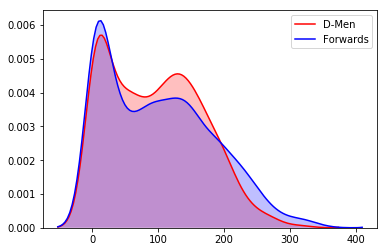

In [72]:
# interesting that defensive players see  2 point drop and a significantly, if still significant, smaller p-value
p1=sb.kdeplot(player_data['Fantasy Points'][player_data['D']== 1], shade=True, color="r",  label='D-Men')
p1=sb.kdeplot(player_data['Fantasy Points'][player_data['D']== 0], shade=True, color="b", label='Forwards')

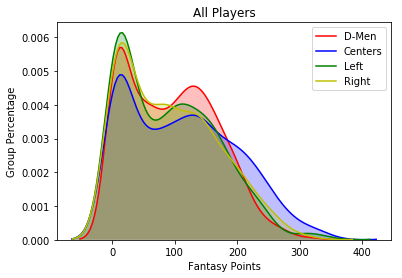

In [80]:
## all four values at once, Centers still stand out the most
p1=sb.kdeplot(player_data['Fantasy Points'][player_data['D']== 1], shade=True, color="r",  label='D-Men')
p1=sb.kdeplot(player_data['Fantasy Points'][player_data['C']== 1], shade=True, color="b",  label='Centers')
p1=sb.kdeplot(player_data['Fantasy Points'][player_data['L']== 1], shade=True, color="g",  label='Left')
p1=sb.kdeplot(player_data['Fantasy Points'][player_data['R']== 1], shade=True, color="y",  label='Right')
plt.xlabel('Fantasy Points')
plt.ylabel('Group Percentage')
plt.title("All Players")
plt.savefig('Images/score_distro1.png')

I think the most interesting development here is that dip that happens right around the 75 point range. I think we can conclude that's basically the cut line for those who made it above the 20 game marker. To test that I limited the new player data and re-made the plot.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


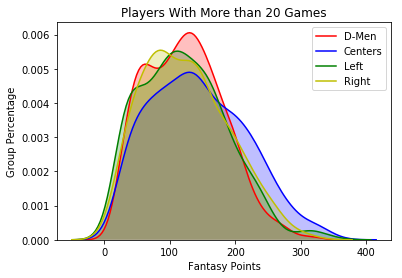

In [14]:
twenty_gamers = player_data[new_player_data['GP'] > 20]
p1=sb.kdeplot(twenty_gamers['Fantasy Points'][twenty_gamers['D']== 1], shade=True, color="r",  label='D-Men')
p1=sb.kdeplot(twenty_gamers['Fantasy Points'][twenty_gamers['C']== 1], shade=True, color="b",  label='Centers')
p1=sb.kdeplot(twenty_gamers['Fantasy Points'][twenty_gamers['L']== 1], shade=True, color="g",  label='Left')
p1=sb.kdeplot(twenty_gamers['Fantasy Points'][twenty_gamers['R']== 1], shade=True, color="y",  label='Right')
plt.xlabel('Fantasy Points')
plt.ylabel('Group Percentage')
plt.title("Players With More than 20 Games")
plt.savefig('Images/score_distro2.png')

This is essentially exactly what we expected, the distribution instantly went from being bipolar to unimodal. Interesting that it seems the Defensive players both have higher peaks on both the bottom and the middle above right wingers but right wingers have a spike above 40.  Quick look at just Defensive players and Right Wingers:

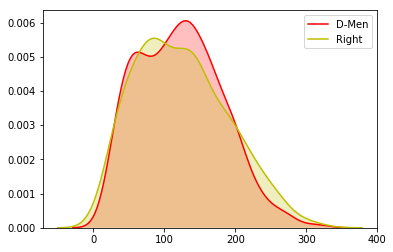

In [15]:
p1=sb.kdeplot(twenty_gamers['Fantasy Points'][twenty_gamers['D']== 1], shade=True, color="r",  label='D-Men')
p1=sb.kdeplot(twenty_gamers['Fantasy Points'][twenty_gamers['R']== 1], shade=True, color="y",  label='Right')

## Conclusion

What we see here from our quick analysis breaks down into three main points, the first two of which are not particularly surprising. Those primary points are that once you get past the set of players who will be cut, there is a remarkably normal distribution of points, and second that there is little benefit to creating additional features around points per game.

The more third interesting segment is how correlated time is to a players performance as we can see in the mapping of correlations above.  This is certainly a prime example of how correlation is not causation, but time on ice stands as the most important metric we see above, and will certainly play a role in our models in the next segment. 